In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from GDAnalysisAC import LinDiscAnalysis
from GDAnalysisAC import utilsAC

In [92]:
def pipeline(X, y):
    train_x, train_y, test_x, test_y = utilsAC.splitTrainTest(X, y, train_ratio=0.7)
    train_x, train_min, train_max = utilsAC.normMinMax(train_x, mode='train')
    test_x = utilsAC.normMinMax(test_x, mode='test', train_min=train_min, train_max=train_max)

    lda_ac = LinDiscAnalysis()
    lda_ac.fit(train_x, train_y)
    pred = lda_ac.predict(test_x)
    pf = utilsAC.get_performance_measure(test_y, pred)
    print(f'Performance Measures: {pf}\n')
    print(f'Trained weights: {lda_ac.get_params()}\n')
    utilsAC.plot_dec_bound(X, y, lda_ac.get_params())
    if len(np.unique(y)) == 2:
        pred_prob = lda_ac.predict(test_x, prob=True)
        thresh = np.arange(-1, 1, 0.001)
        utilsAC.plot_roc(test_y, pred_prob, thresh=thresh)

## Data 1 (Binary LDA)

In [93]:
data1 = pd.read_csv('data/data1.csv', header=None)
data1.head()

,0,1,2
0,-0.69736,-3.6535,1
1,-4.82200,-7.6336,1
2,-8.23430,-7.5536,1
3,-6.07640,-11.3800,1
4,-10.73600,-14.3760,1


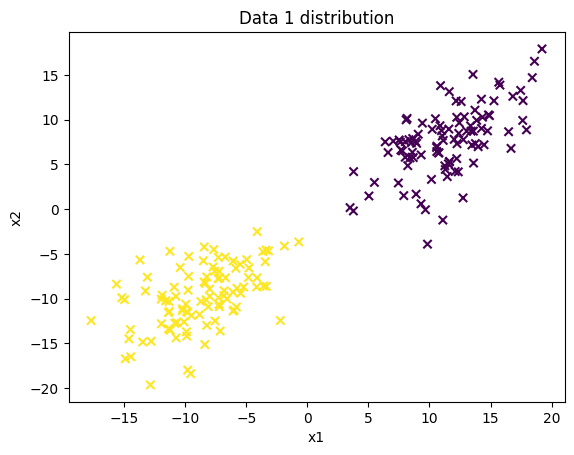

In [94]:
plt.scatter(data1[0], data1[1], marker='x', c=data1[2])
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Data 1 distribution')
plt.show()

In [95]:
data1_x = data1.iloc[:, :-1]
data1_y = data1.iloc[:, -1]

data1_y.value_counts()

2
1    100
0    100
Name: count, dtype: int64

Performance Measures: {'tp': 29, 'tn': 31, 'fp': 0, 'fn': 0, 'precision': 1.0, 'recall': 1.0, 'spec': 1.0, 'f1': 1.0}

Trained weights: [ 3.53839769 -4.71025353 -2.1834634 ]



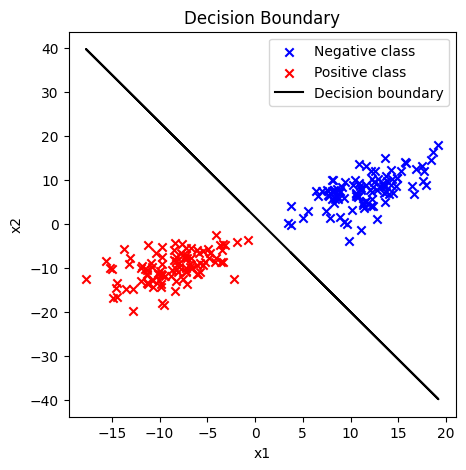

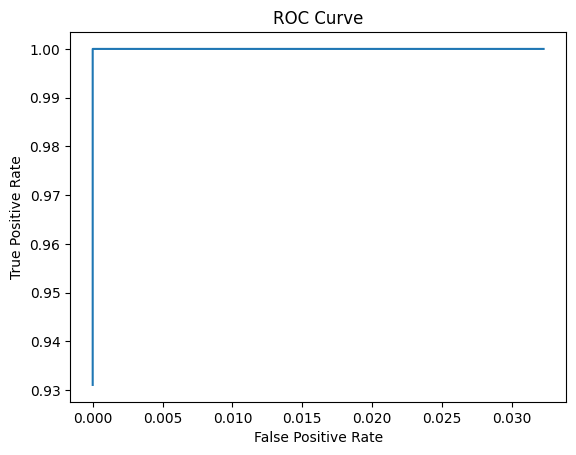

In [96]:
pipeline(data1_x, data1_y)

## Data 2 - Heart Disease Dataset (Binary LDA)

In [97]:
data2 = pd.read_csv('data/heart.csv')
data2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [98]:
data2_x = data2.iloc[:, :-1]
data2_y = data2.iloc[:, -1]

data2_y.value_counts()

target
1    526
0    499
Name: count, dtype: int64

Performance Measures: {'tp': 149, 'tn': 105, 'fp': 42, 'fn': 12, 'precision': 0.7801047120418848, 'recall': 0.9254658385093167, 'spec': 0.7142857142857143, 'f1': 0.8465909090909091}

Trained weights: [ 1.45222261 -0.54034272 -0.85144671  1.3396408  -0.71387494 -0.74497022
 -0.0274416   0.55204484  1.27078049 -0.62999707 -1.65302145  0.50266222
 -1.67679737 -1.12698669]

Facility to plot decision boundary for data with more than 3 features has not been added yet!


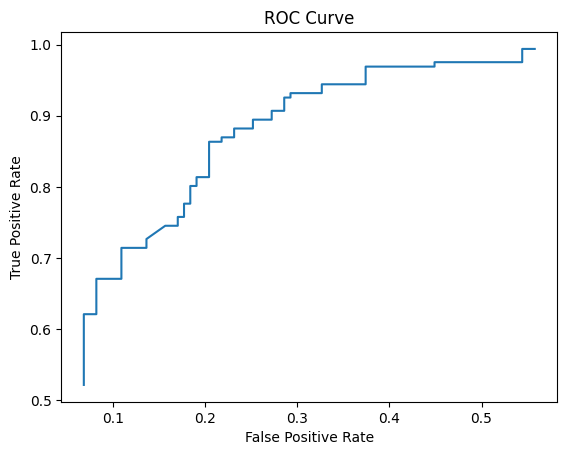

In [99]:
pipeline(data2_x, data2_y)

## Data 3 (Multiclass LDA)

In [100]:
data3 = pd.read_csv('data/data3.csv', header=None)
print(data3.iloc[:, -1].value_counts())
data3.head()

3
1    100
2    100
3    100
Name: count, dtype: int64


,0,1,2,3
0,-6.2213,2.8432,10.5470,1
1,-14.9730,-6.4275,3.8337,1
2,-5.9850,-3.9402,11.9860,1
3,-6.8994,1.8714,11.2250,1
4,-4.8246,4.9447,17.2610,1


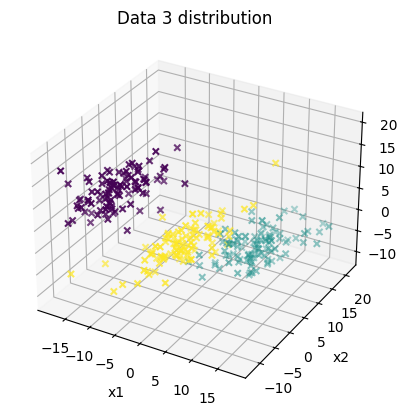

In [101]:
ax = plt.axes(projection='3d')
ax.scatter3D(data3.iloc[:, 0], data3.iloc[:, 1], data3.iloc[:, 2], c=data3.iloc[:, 3], marker='x')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
plt.title('Data 3 distribution')
plt.show()

In [102]:
data3_x = data3.iloc[:, :-1]
data3_y = data3.iloc[:, -1]

Performance Measures: {'acc': 0.9222222222222223}

Trained weights: {1: array([-14.70762495,  22.6778924 ,   5.07456884,  28.77641469]), 2: array([-15.27768519,  26.70166572,   7.22019934,  23.88098213]), 3: array([-12.53597787,  32.29765741,  -4.10021086,  23.44429173])}



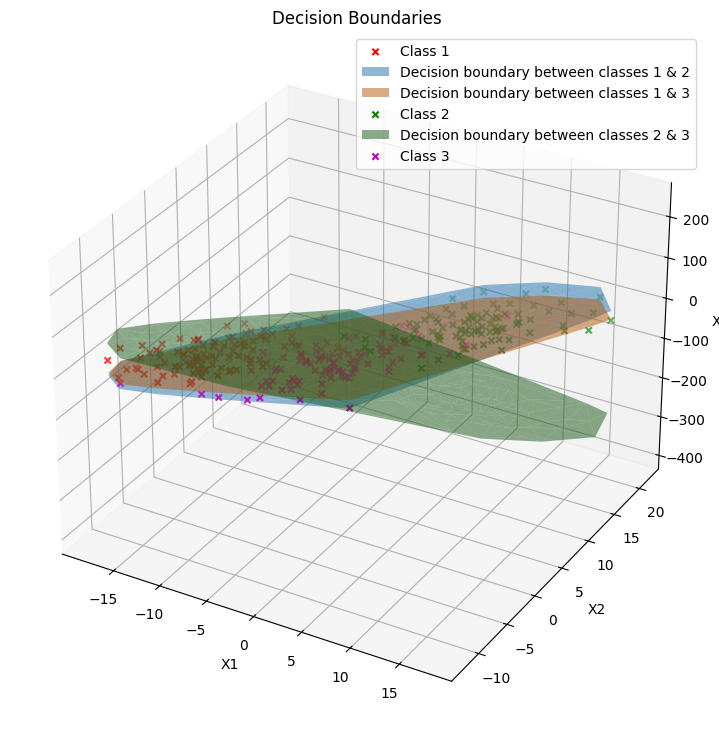

In [103]:
pipeline(data3_x, data3_y)

## Data 4

In [104]:
data4 = pd.read_csv('data/data4.csv', header=None)
print(data4.shape)
data4.head()

(200, 3)


,0,1,2
0,14,42,1
1,29,40,1
2,22,22,1
3,11,20,1
4,10,35,1


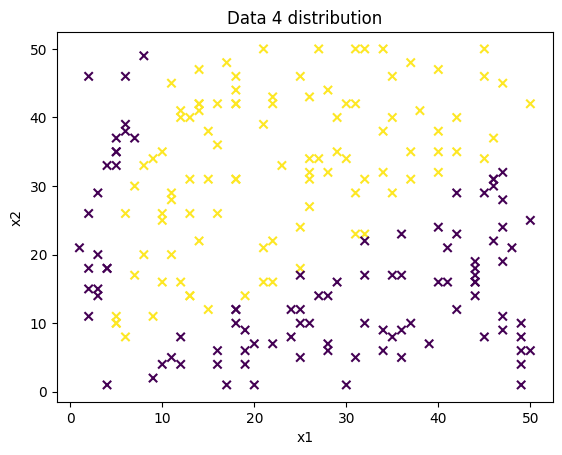

In [105]:
plt.scatter(data4[0], data4[1], marker='x', c=data4[2])
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Data 4 distribution')
plt.show()

In [106]:
data4 = data4.sample(frac=1).reset_index(drop=True)
data4_x = data4.iloc[:, :-1]
data4_y = data4.iloc[:, -1]
data4_y.value_counts()

2
 1    100
-1    100
Name: count, dtype: int64

In [107]:
prob = {}
cov_mat = {}
mean = {}
for c in np.unique(data4_y):
    prob[c] = data4_y.value_counts()[c] / len(data4_y)
    cov_mat[c] = data4_x[data4_y == c].cov()
    mean[c] = data4_x[data4_y == c].mean()

In [108]:
pred_prob = pd.DataFrame(columns=np.unique(data4_y))
for c in np.unique(data4_y):
    pred_prob[c] = np.log(prob[c]) - 0.5 * np.log(np.linalg.det(cov_mat[c])) - 0.5 * np.diag((data4_x - mean[c]).dot(np.linalg.inv(cov_mat[c])).dot((data4_x - mean[c]).T))

pred = []
for i in range(len(data4_x)):
    max_prob = -np.inf
    pred_class = None
    for j in pred_prob.keys():
        if pred_prob[j][i] > max_prob:
            max_prob = pred_prob[j][i]
            pred_class = j
            pred.append(pred_class)
utilsAC.get_performance_measure(data4_y, pred)

{'tp': 29,
 'tn': 68,
 'fp': 32,
 'fn': 71,
 'precision': 0.47540983606557374,
 'recall': 0.29,
 'spec': 0.68,
 'f1': 0.3602484472049689}